### Analyse des ingrédients

Extension du classeur _Resto_ sur l'analyse des ingrédients présent dans la colonne _choice\_description_.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

df1 = pd.read_csv("source/resto.csv")

In [24]:
df1

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
0,0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,1,Izze,[Clementine],$3.39
2,2,1,1,Nantucket Nectar,[Apple],$3.39
3,3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [25]:
df1_not_nan = df1[df1["choice_description"].isna() == False]
df2 = df1_not_nan[df1_not_nan["choice_description"].str.contains("\[.*\[.*\].*\]")]
df2

,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
4,4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
7,7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [26]:
df2 = df1_not_nan[df1_not_nan["choice_description"].str.contains("\[.*\[.*\].*\]")]
df2["choice_description"] = df2["choice_description"].replace(regex=r"-", value=" ")
df2["choice_description"] = df2["choice_description"].replace({r'(\w[\w\s\(\)]*[\w\)])' : r'"\1"'}, regex=True)
#.replace(regex=r", \[", value="', [")
#.replace({r'(.+),' : r'\1,'}, regex=True)
#df2["choice_description"] = df2["choice_description"].replace(regex=r"\[", value="['")
df2

C:\Users\julie\AppData\Local\Temp\ipykernel_17156\1969088349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["choice_description"] = df2["choice_description"].replace(regex=r"-", value=" ")
C:\Users\julie\AppData\Local\Temp\ipykernel_17156\1969088349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["choice_description"] = df2["choice_description"].replace({r'(\w[\w\s\(\)]*[\w\)])' : r'"\1"'}, regex=True)


,Unnamed: 0,order_id,quantity,item_name,choice_description,item_price
4,4,2,2,Chicken Bowl,"[""Tomatillo Red Chili Salsa (Hot)"", [""Black Be...",$16.98
5,5,3,1,Chicken Bowl,"[""Fresh Tomato Salsa (Mild)"", [""Rice"", ""Cheese...",$10.98
7,7,4,1,Steak Burrito,"[""Tomatillo Red Chili Salsa"", [""Fajita Vegetab...",$11.75
8,8,4,1,Steak Soft Tacos,"[""Tomatillo Green Chili Salsa"", [""Pinto Beans""...",$9.25
9,9,5,1,Steak Burrito,"[""Fresh Tomato Salsa"", [""Rice"", ""Black Beans"",...",$9.25
...,...,...,...,...,...,...
4617,4617,1833,1,Steak Burrito,"[""Fresh Tomato Salsa"", [""Rice"", ""Black Beans"",...",$11.75
4618,4618,1833,1,Steak Burrito,"[""Fresh Tomato Salsa"", [""Rice"", ""Sour Cream"", ...",$11.75
4619,4619,1834,1,Chicken Salad Bowl,"[""Fresh Tomato Salsa"", [""Fajita Vegetables"", ""...",$11.25
4620,4620,1834,1,Chicken Salad Bowl,"[""Fresh Tomato Salsa"", [""Fajita Vegetables"", ""...",$8.75


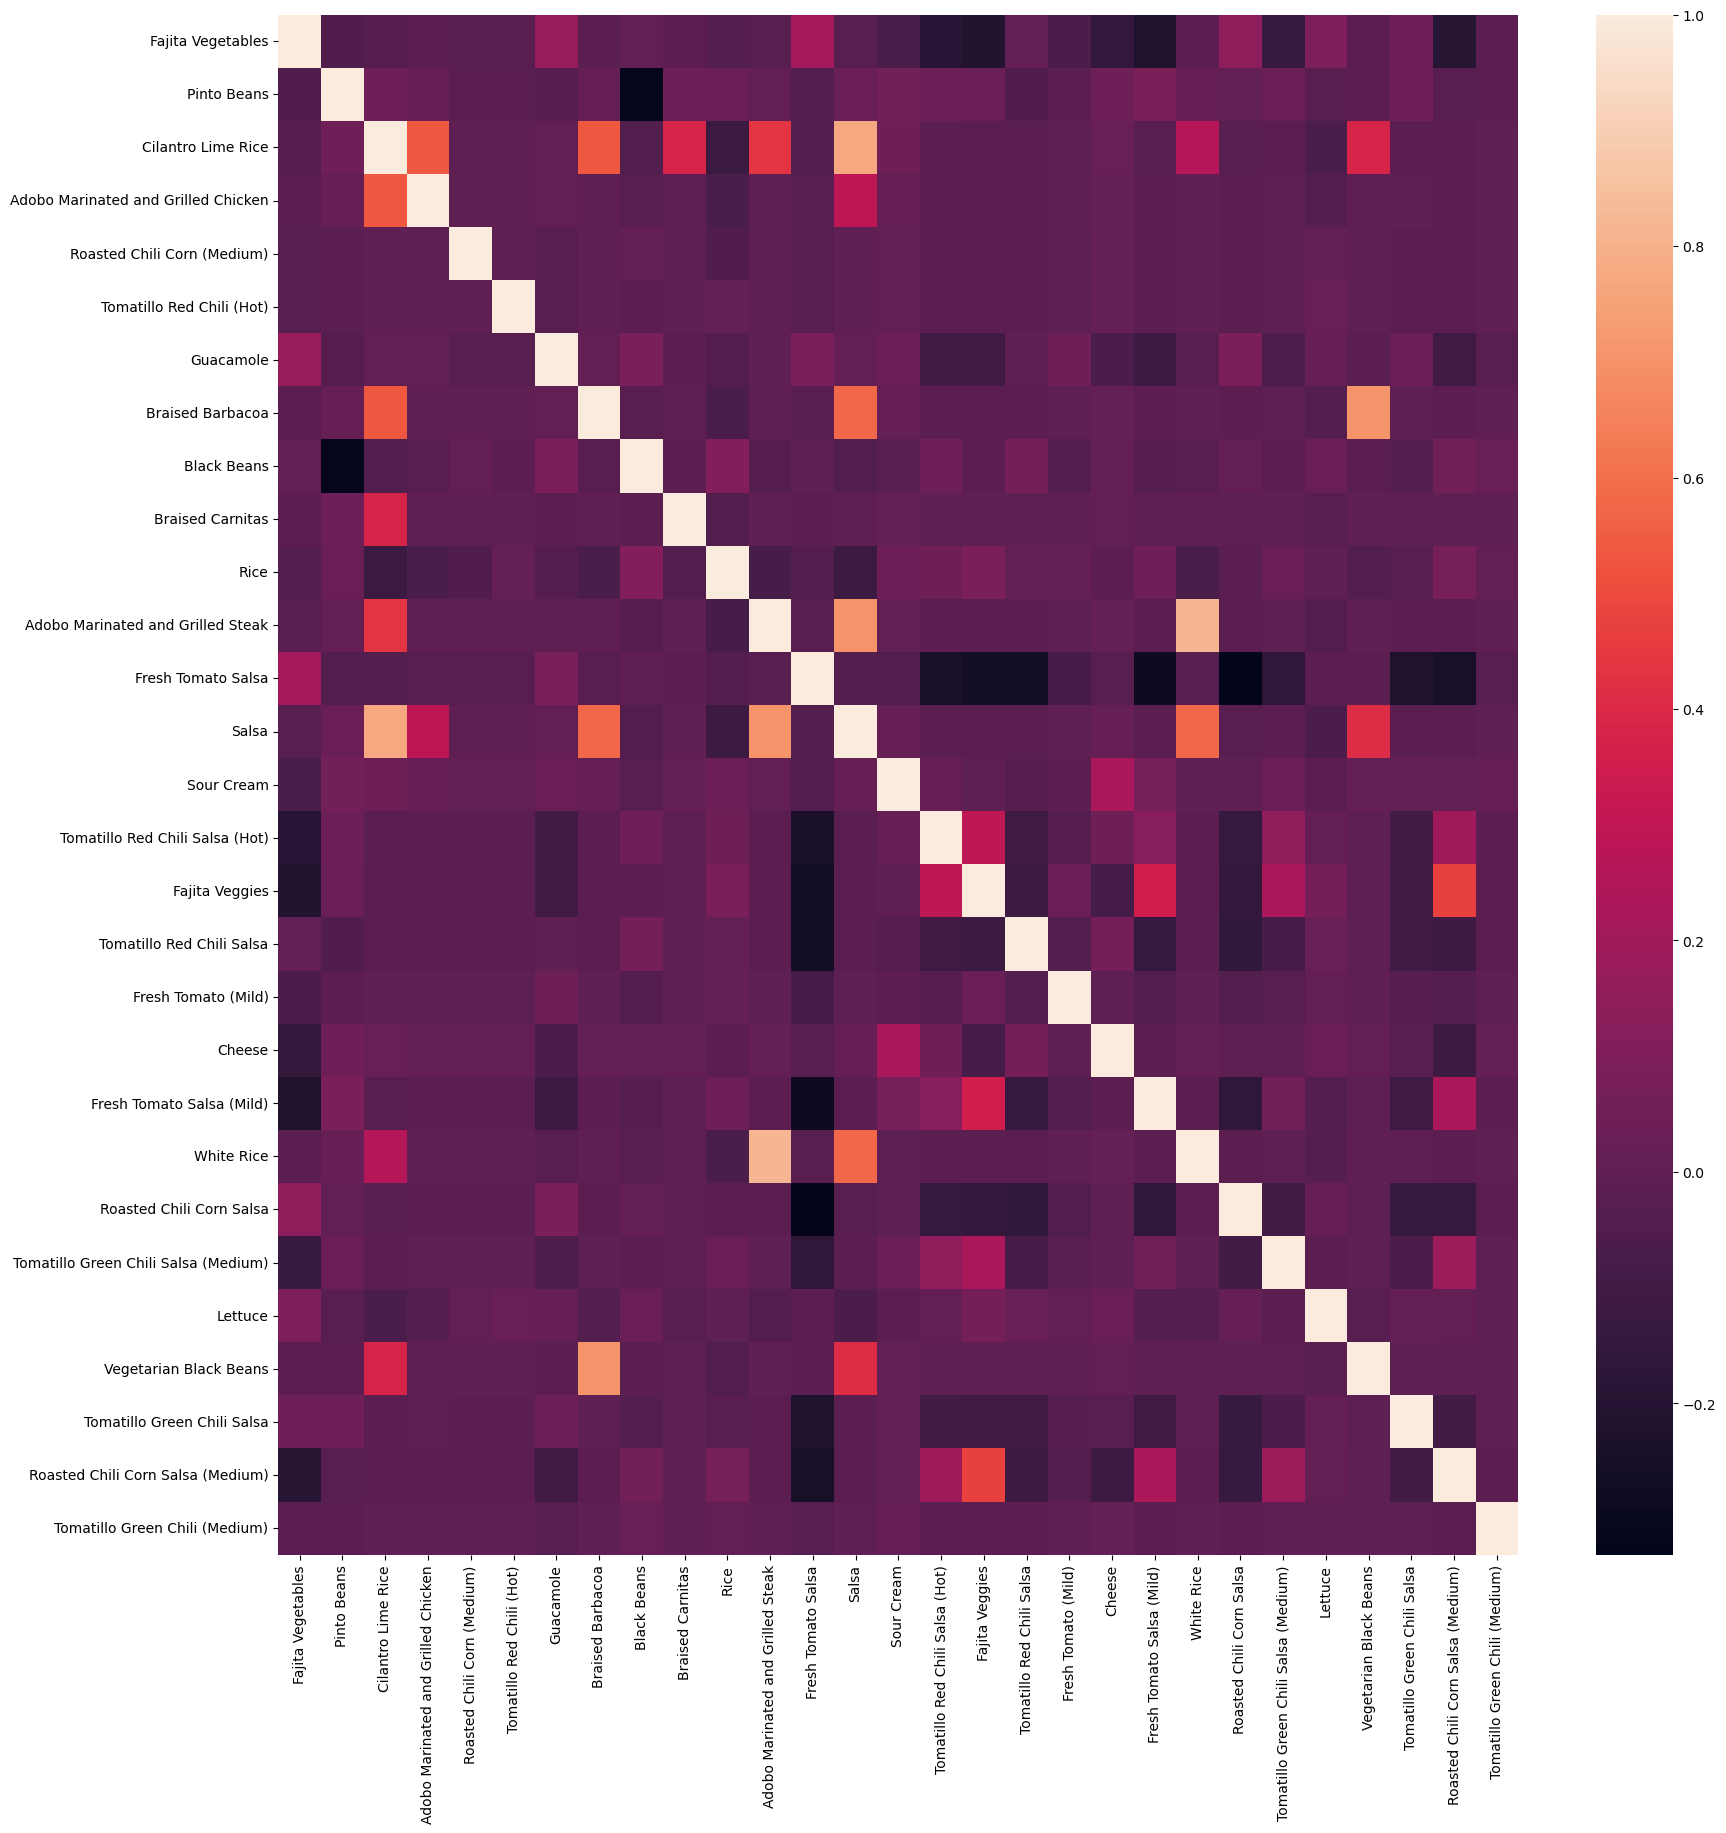

In [120]:
def flatten(list_of_lists):
    """
    Flatten a list of lists with unknown and asymetric dimensions
    """
    if len(list_of_lists) == 0:
        return list_of_lists
    if isinstance(list_of_lists[0], list):
        return flatten(list_of_lists[0]) + flatten(list_of_lists[1:])
    return list_of_lists[:1] + flatten(list_of_lists[1:])

data = {"item_name": []}
ingr_list = []
ingr_set = set()

# Add item_name and flatten the ingredients lists
for line in df2.values:
    data["item_name"].append(line[3])
    flat_ingr = flatten(ast.literal_eval(line[-2]))
    ingr_list.append(flat_ingr)


for line in ingr_list:
    ingr_set |= {elem for elem in line}

data.update({ingr:[] for ingr in ingr_set})

for line in ingr_list:
    for elem in ingr_set:
        data[elem].append(True) if elem in line else data[elem].append(False)

#settest = {elem for elem in line for line in ingr_list}
df3 = pd.DataFrame(data)

plt.subplots(figsize=(20,20))
sns.heatmap(df3.corr())
plt.show()

In [122]:
help(df3.corr)

Help on method corr in module pandas.core.frame:

corr(method: 'str | Callable[[np.ndarray, np.ndarray], float]' = 'pearson', min_periods: 'int' = 1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise correlation of columns, excluding NA/null values.
    
    Parameters
    ----------
    method : {'pearson', 'kendall', 'spearman'} or callable
        Method of correlation:
    
        * pearson : standard correlation coefficient
        * kendall : Kendall Tau correlation coefficient
        * spearman : Spearman rank correlation
        * callable: callable with input two 1d ndarrays
            and returning a float. Note that the returned matrix from corr
            will have 1 along the diagonals and will be symmetric
            regardless of the callable's behavior.
    min_periods : int, optional
        Minimum number of observations required per pair of columns
        to have a valid result. Currently only available for Pearson
        and S